In [44]:
import tensorflow as tf
from tensorflow import keras
import glob
import random
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [45]:
digit_classifier = keras.models.load_model('./trained_models/digit_classifier.h5')

In [46]:
digit_classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


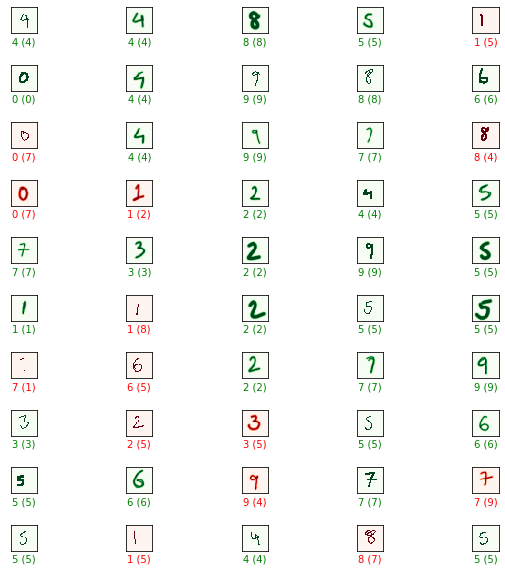

In [47]:
test_images = glob.glob('./test_digits/*')
count = 1
correct_count = 0
plt.figure(figsize = (10, 10))
plt.title("Predicted Label (Actual Label)", loc='center', pad = 2)
for i in range(50):
    test_image = test_images[i]
    test_label = os.path.basename(test_image)[0]
    
    img = mpimg.imread(test_image)
#    img = 255*(1 - img[:, :, 0])
    #img = np.sum(img, axis=2)/3.
    img = (4 - np.sum(img, axis=2))
    img = img/np.max(img)    
    prediction = str(np.argmax(digit_classifier.predict(img.reshape(1, 28, 28))))
    
    plt.subplot(10, 5, count)
    plt.subplots_adjust(hspace=1.2)
    
    if(test_label == prediction):
        cmap, color = 'Greens', 'green'
        correct_count = correct_count + 1
    else:
        cmap, color = 'Reds', 'red'
        color = 'red'
    
    plt.imshow(img, cmap = cmap)
    plt.xlabel(test_label + " ("+str(prediction)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    count = count + 1

In [48]:
print("Accuracy percentage: ", 100.*correct_count/50., "%")

Accuracy percentage:  72.0 %


1.0


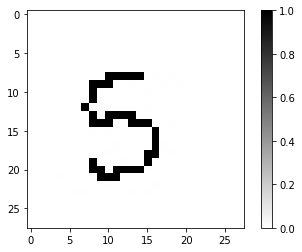

In [49]:
# Checking to see if the images look fine (artifact free, primarily)
plt.imshow(img, cmap = 'binary')
plt.colorbar()
print(np.max(img))

#### Let's do a sanity check by running the MNIST test dataset through the network

In [50]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [51]:
test_loss, test_accuracy = digit_classifier.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

#### Sure enough, the accuracy on the test set is 98% - are we overfitting to the MNIST set?

In [52]:
train_loss, train_accuracy = digit_classifier.evaluate(train_images, train_labels)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Similarly high performance on the training set

255


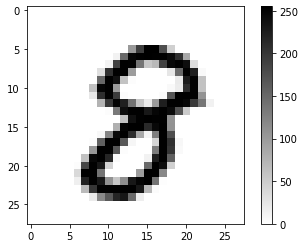

In [53]:
# What do MNIST images look like?
train_images.shape
index = random.randint(0, train_images.shape[0])
plt.imshow(train_images[index].reshape(28, 28), cmap = 'binary')
plt.colorbar()
print(np.max(train_images[index]))

### Let's retrain the model here, then plot it's accuracy over time

In [54]:
history = digit_classifier.fit(partial_x_train, partial_y_train, validation_data=(x_val, y_val), epochs = 20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 98us/sample - loss: 8.7123 - accuracy: 0.9897 - val_loss: 5.3100 - val_accuracy: 0.9924
Epoch 2/20
50000/50000 [==============================] - 5s 100us/sample - loss: 3.1425 - accuracy: 0.9948 - val_loss: 3.1623 - val_accuracy: 0.9946
Epoch 3/20
50000/50000 [==============================] - 5s 101us/sample - loss: 1.8455 - accuracy: 0.9961 - val_loss: 1.8554 - val_accuracy: 0.9957
Epoch 4/20
50000/50000 [==============================] - 5s 93us/sample - loss: 2.6034 - accuracy: 0.9954 - val_loss: 3.1229 - val_accuracy: 0.9948
Epoch 5/20
50000/50000 [==============================] - 5s 93us/sample - loss: 2.2087 - accuracy: 0.9959 - val_loss: 4.1741 - val_accuracy: 0.9917
Epoch 6/20
50000/50000 [==============================] - 5s 93us/sample - loss: 1.9772 - accuracy: 0.9959 - val_loss: 3.5987 - val_accuracy: 0.9938
Epoch 7/20
50000/50000 [==============================

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

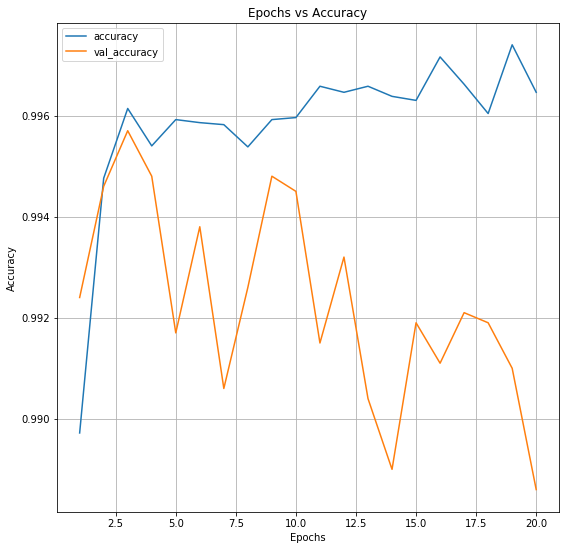

In [58]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(9, 9))
plt.plot(epochs, acc, label = 'accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

### Why not test on the network after re-training?

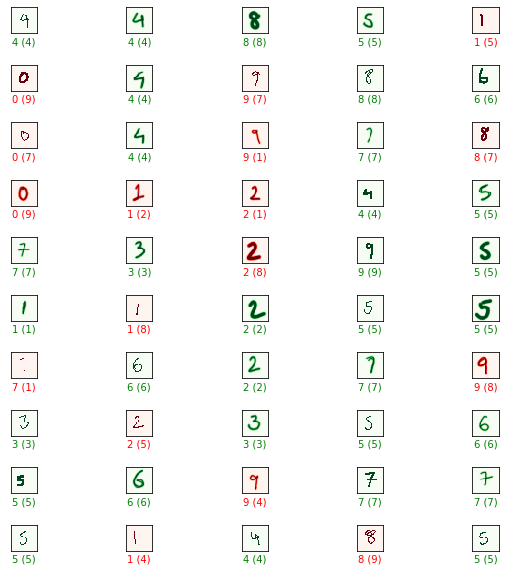

In [59]:
test_images = glob.glob('./test_digits/*')
count = 1
correct_count = 0
plt.figure(figsize = (10, 10))
plt.title("Predicted Label (Actual Label)", loc='center', pad = 2)
for i in range(50):
    test_image = test_images[i]
    test_label = os.path.basename(test_image)[0]
    
    image = mpimg.imread(test_image)
    
    img = mpimg.imread(test_image)
#    img = 255*(1 - img[:, :, 0])
    img = (4 - np.sum(img, axis=2))
    img = img/np.max(img)    
 
    prediction = str(np.argmax(digit_classifier.predict(img.reshape(1, 28, 28))))
    
    plt.subplot(10, 5, count)
    plt.subplots_adjust(hspace=1.2)
    
    if(test_label == prediction):
        cmap, color = 'Greens', 'green'
        correct_count = correct_count + 1
    else:
        cmap, color = 'Reds', 'red'
        color = 'red'
    
    plt.imshow(img, cmap = cmap)
    plt.xlabel(test_label + " ("+str(prediction)+")", color = color)
    plt.xticks([])
    plt.yticks([])
    
    count = count + 1

In [60]:
print("Accuracy percentage: ", 100.*correct_count/50., "%")

Accuracy percentage:  66.0 %


### After re-training, my network is doing worse?!

In [61]:
train_images.shape

(60000, 28, 28)

In [62]:
img = train_images[0].reshape(28, 28)

In [63]:
img.shape

(28, 28)

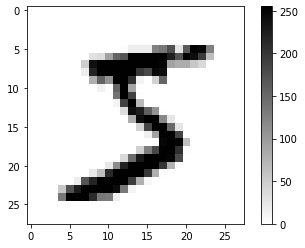

In [64]:
plt.imshow(img, cmap='binary')
plt.colorbar()